# __Singular Value Decomposition of the MNIST Dataset__
### __Import Packages__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

In [3]:
# Plotting functions
def plot(data, n_plots, title="Singular Values", xlabel="Index", ylabel="Value", digit_form=False, reconstruct=False, U=None, E=None, V_t=None):
    if digit_form:
        fig, axes = plt.subplots(1, n_plots, figsize=(n_plots, 1))

        for i in range(n_plots):
            ax = axes[i]
            ax.imshow(data[i].reshape(28, 28), cmap='gray')
            ax.axis('off')

        plt.show()
        return

    if reconstruct:
        singular_values = [1, 5, 50, 100, 300, 500, 784]
        fig, subplots = plt.subplots(1, len(singular_values),  figsize=(len(singular_values) * 2, 2))
        for i in range(len(singular_values)):
            curr_plot = subplots[i]
            
            # Take the first k singular values and vectors
            U_k = U[:, :singular_values[i]]
            E_k = np.diag(E[:singular_values[i]])
            V_k = V_t[:singular_values[i], :]

            # Reconstruct the data
            reconstructed_data = np.dot(U_k, np.dot(E_k, V_k))
            curr_plot.imshow(reconstructed_data[0].reshape(28, 28), cmap='gray')
            curr_plot.set_title(f"{singular_values[i]} Values", loc="center")
        plt.tight_layout()
        return

    if n_plots == 1:
        # Plotting the value vs index of the singular values
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(data)), data, marker='.', linestyle='-')
        plt.title(title + " Linear Plot")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()
        return

    elif n_plots == 2:
        # Plot linear and semi-log
        fig, (graph_1, graph_2) = plt.subplots(1, n_plots, figsize=(20, 5))

        # linear
        graph_1.plot(range(len(data)), data, marker='o', linestyle='-')
        graph_1.set_title(title + " Linear Plot")
        graph_1.set_xlabel(xlabel)
        graph_1.set_ylabel(ylabel)

        # semi-log
        graph_2.semilogy(range(len(data)), data, marker='o', linestyle='-')
        graph_2.set_title(title + " Semi-Log Plot")
        graph_2.set_xlabel(xlabel)
        graph_2.set_ylabel(ylabel)
        plt.tight_layout()
        plt.show()
        return
        
    else:
        return 'invalid'

### __Import dataset__

In [12]:
(x_train, _), (x_test, _) = mnist.load_data()

n_train, _, _ = x_train.shape
n_test, _, _ = x_test.shape

# Transform into row vectors
x_train_reshaped = x_train.reshape(n_train, -1)[:1, :]
data = x_train_reshaped
print(data.shape)

(1, 784)


### __Plot the Initial Digits__

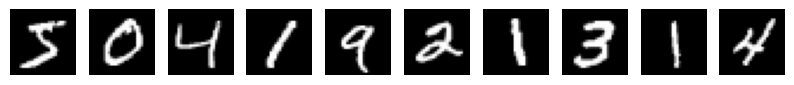

In [5]:
plot(data=data_row_vectors, n_plots=10, digit_form=True)

### __SVD on Row Vectors__

In [6]:
U, E, Vt = np.linalg.svd(data_row_vectors, full_matrices=False)

print('U shape: ', U.shape)
print('E shape: ', E.shape)
print('Vt shape: ', Vt.shape)

U shape:  (70000, 784)
E shape:  (784,)
Vt shape:  (784, 784)


### __Plotting Singular Values__

In [ ]:
plot(data=E, n_plots=1)

#### The graph (linear scale) shows a very sharp initial decrease but flattens out after a few hundred values

### __Comparing the SVD Dimension-Reduced Images__

In [ ]:
plot(data=data_row_vectors, n_plots=-1, digit_form=False, reconstruct=True, U=U, E=E, V_t=Vt)

In [ ]:
plot(data=E, n_plots=2)

#### The semi-log graph shows a very steep drop off around the 700th index

### __Translating to Center of Image Frame__

In [ ]:
# Get width and height of images
width = x_train.shape[1]
height = x_train.shape[1]
print('image width: ', width)
print('image height: ', height)

In [9]:
# Calculating translation vector b
data_center = np.mean(data_row_vectors, axis=0)

print(data_center.shape)
image_center = [width/2, height/2]

b_x = data_center - image_center[0]
b_y = data_center - image_center[1]
b = np.column_stack((b_x, b_y)) # add 2 dimensions
print('translation vector shape: ', b.shape)

translated_row_vectors = np.empty_like(data_row_vectors)

# Applying translation to each entry
for i in range(data_row_vectors.shape[0]):
    translated_row_vectors[i] = data_row_vectors[i] - b[:, 0]  # x translation
    translated_row_vectors[i] = data_row_vectors[i] - b[:, 1]  # y translation
    
print('translated data shape: ', translated_row_vectors.shape)
%store translated_row_vectors

(784,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.80000000e-03 6.71428571e-03 3.08571429e-03 1.28571429e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.28571429e-04 1.32857143e-03 1.13285714e-02 2.30714286e-02
 4.32285714e-02 6.22428571e-02 1.17928571e-01 1.71242857e-01
 1.93414286e-01 1.90085714e-01 2.06285714e-01 1.82742857e-01
 1.70100000e-01 1.44514286e-01 9.92428571e-02 6.82285714e-02
 4.88714286e-02 1.83142857e-02 8.64285714e-03 3.02857143e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.14285714e-04 6.00000000e-04
 5.95714286e-03 1.09428571e-02 5.63000000e-02 1.39385714e-01
 2.68228571e-01 5

### __Plotting the Translated Digits__

In [ ]:
plot(data=translated_row_vectors, n_plots=10, digit_form=True)

### __Running SVD on the Translated Data__

In [ ]:
U_translated, E_translated, Vt_translated = np.linalg.svd(translated_row_vectors, full_matrices=False)

print('U matrix shape: ', U_translated.shape)
print('E matrix shape: ', E_translated.shape)
print('V transpose matrix shape: ', Vt_translated.shape)

### __Plotting the Translated Singular Values__

In [ ]:
plot(data=E_translated, n_plots=1)

#### The translated image singular values have a steeper, faster drop-off than the non-translated images in a linear plot

In [ ]:
plot(data=E_translated, n_plots=2)

#### Semi-log plot for translated image singular values looks similar to the non-translated singular values

### __Comparing the SVD-Reduced Images__

In [ ]:
plot(data=translated_row_vectors, n_plots=-1, digit_form=False, reconstruct=True, U=U_translated, E=E_translated, V_t=Vt_translated)

# __Non-Linear Transformation__

$$
f(x) = \begin{cases} 
0 & \text{if } x \leq 0 \\
1 & \text{if } x > 0 
\end{cases}
$$

Here we set each value that is greater than 0 to equal 1.

In [ ]:
transformed_data = np.where(data_row_vectors > 0, 1, 0)

#### SVD

In [ ]:
U_transformed, E_transformed, Vt_transformed = np.linalg.svd(transformed_data, full_matrices=False)

print('U shape: ', U_transformed.shape)
print('E shape: ', E_transformed.shape)
print('Vt shape: ', Vt_transformed.shape)

### Plotting the singular values

In [ ]:
plot(data=E_transformed, n_plots=1)

In [ ]:
plot(data=E, n_plots=1)